In [1]:
import pandas
from matplotlib import pyplot as plt
import seaborn as sns

from mlos_bench.storage import from_config

### Connect using existing mlos_bench configs

In [2]:
storage = from_config(config_file="config/storage/sqlite.jsonc")

### List all experiments

In [3]:
storage.experiments

{'MySQLBench2VMs-1param': Experiment :: MySQLBench2VMs-1param,
 'MySQLBench2VMs-3params': Experiment :: MySQLBench2VMs-3params,
 'MySQLBench2VMs-3params.1': Experiment :: MySQLBench2VMs-3params.1,
 'MySQLBench2VMs-7params.1': Experiment :: MySQLBench2VMs-7params.1,
 'MySQLBench2VMs-categoricalparams': Experiment :: MySQLBench2VMs-categoricalparams,
 'MysqlBench2VMs': Experiment :: MysqlBench2VMs,
 'MysqlBench2VMs-7params': Experiment :: MysqlBench2VMs-7params,
 'MysqlBench2VMs-categorical-1': Experiment :: MysqlBench2VMs-categorical-1,
 'MysqlBench2VMs-sched_migration_cost_ns': Experiment :: MysqlBench2VMs-sched_migration_cost_ns,
 'MysqlBench2VMs-testif346valid': Experiment :: MysqlBench2VMs-testif346valid,
 'MysqlBench2VMs-testifworking': Experiment :: MysqlBench2VMs-testifworking,
 'MysqlBench2VMs.categorical.1': Experiment :: MysqlBench2VMs.categorical.1,
 'MysqlBench2VMsKernel': Experiment :: MysqlBench2VMsKernel,
 'MysqlBench2VMsKernel1': Experiment :: MysqlBench2VMsKernel1,
 'My

## Get all data for one experiment

In [4]:
exp = storage.experiments["mysql-innodb-explore-D2S"]
exp

Experiment :: mysql-innodb-explore-D2S

In [5]:
df = exp.results
df.head()

,trial_id,ts_start,ts_end,config_id,status,config.innodb_buffer_pool_dump_pct,config.innodb_buffer_pool_instances,config.innodb_flush_method,config.innodb_log_buffer_size,config.innodb_old_blocks_pct,...,result.latency_pct,result.other,result.percentile,result.reads,result.reconnects,result.score,result.threads,result.time,result.total,result.writes
0,1,2023-07-20 20:18:30,2023-07-20 20:51:50,382,SUCCEEDED,100,8,fsync,16,37,...,69.289067,39.732553,95.0,1424.230357,0.0,69.289067,0.0,600.010582,1998.272415,534.309505
1,2,2023-07-20 20:51:51,2023-07-20 21:06:20,383,SUCCEEDED,78,2,O_DSYNC,461,23,...,99.327030,31.044015,95.0,1101.909230,0.0,99.327030,0.0,600.178903,1544.614672,411.661428
2,3,2023-07-20 21:06:20,2023-07-20 21:09:04,384,FAILED,9,44,fsync,1665,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2023-07-20 21:09:04,2023-07-20 21:12:11,419,FAILED,92,46,fsync,1381,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2023-07-20 21:12:11,2023-07-20 21:26:44,420,SUCCEEDED,52,42,O_DSYNC,1861,34,...,106.745112,26.612829,95.0,955.876192,0.0,106.745112,0.0,600.273162,1341.824690,359.335669


In [6]:
df.loc[1]

trial_id                                                 2
ts_start                               2023-07-20 20:51:51
ts_end                                 2023-07-20 21:06:20
config_id                                              383
status                                           SUCCEEDED
config.innodb_buffer_pool_dump_pct                      78
config.innodb_buffer_pool_instances                      2
config.innodb_flush_method                         O_DSYNC
config.innodb_log_buffer_size                          461
config.innodb_old_blocks_pct                            23
config.join_buffer_size                             797475
config.sort_buffer_size                               5568
result.errors                                          0.0
result.events                                  1544.614672
result.latency_pct                                99.32703
result.other                                     31.044015
result.percentile                                     95

### Plot the results

In [7]:
METRIC = "config.innodb_buffer_pool_instances"
SCORE = "result.score"
CATEGORY = "config.innodb_flush_method"

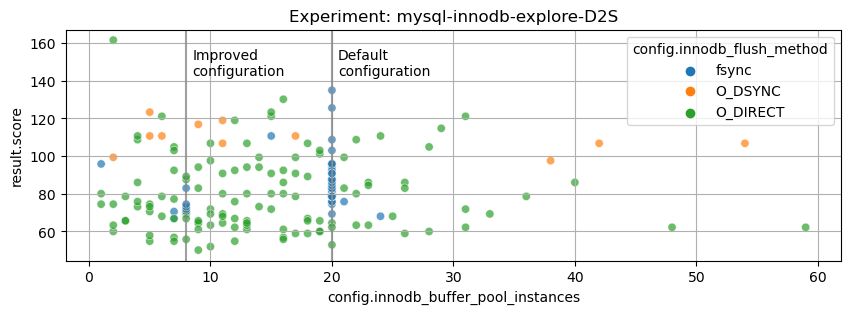

In [8]:
plt.rcParams["figure.figsize"] = (10, 3)

sns.scatterplot(data=df, x=METRIC, y=SCORE, hue=CATEGORY, marker='o', alpha=0.7)

plt.axvline(x=8, color="#888888", alpha=0.8)
plt.text(8.5, 143, "Improved\nconfiguration", horizontalalignment='left', size='medium', color='black')

plt.axvline(x=20, color="#888888", alpha=0.8)
plt.text(20.5, 143, "Default\nconfiguration", horizontalalignment='left', size='medium', color='black')

plt.title("Experiment: " + exp.exp_id)
plt.grid()
plt.show()

## Look at some other experiment

In [9]:
exp_bench = storage.experiments["mysql-innodb-bseries-v346-vmcontrol"]
df_bench = exp_bench.results

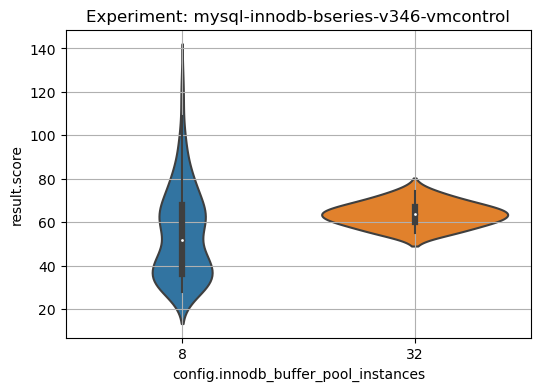

In [10]:
plt.rcParams["figure.figsize"] = (6, 4)

sns.violinplot(data=df_bench, x=METRIC, y=SCORE)

plt.title("Experiment: " + exp_bench.exp_id)
plt.grid()
plt.show()

## Extra: access the data of an individual trial

In [11]:
trial = storage.experiments["mysql-innodb-buf"].trials[16]
trial

mysql-innodb-buf:16 config:705 SUCCEEDED

In [12]:
trial.config

,parameter,value
0,innodb_buffer_pool_dump_pct,74
1,innodb_buffer_pool_instances,16
2,innodb_flush_method,O_DIRECT
3,innodb_log_buffer_size,663
4,innodb_old_blocks_pct,92
5,join_buffer_size,280313
6,sort_buffer_size,31080


In [13]:
trial.metadata

,parameter,value
0,opt_direction,min
1,opt_target,score
2,optimizer,MlosCoreOptimizer:FlamlOptimizer


In [14]:
trial.results

,metric,value
0,errors,0.0
1,events,1731.702333
2,latency_pct,55.824272
3,other,35.176485
4,percentile,95.0
5,reads,1234.730116
6,reconnects,0.0
7,score,55.824272
8,threads,0.0
9,time,600.029641


In [15]:
trial.telemetry

,ts,metric,value
0,2023-09-25 19:30:24,errors,0.0
1,2023-09-25 19:30:24,events,1770.030204
2,2023-09-25 19:30:24,latency_pct,50.107444
3,2023-09-25 19:30:24,other,36.048579
4,2023-09-25 19:30:24,percentile,95.0
...,...,...,...
115,2023-09-25 19:39:24,score,54.828067
116,2023-09-25 19:39:24,threads,30.0
117,2023-09-25 19:39:24,time,600.000436
118,2023-09-25 19:39:24,total,1728.884971
